# Part II - Bike Sharing System Data Analysis
## by Dalal Bin Gheshiyan


## Investigation Overview

In this investigation, I wanted to look at what age people usually ride a bike, and if that can give a prediction about the duration of a trip. also considering gender and his/her type of subscription does it changes? furthermore, what most popular places people ride a bike? 


## Dataset Overview

The data consists of information regarding 183412 rides made in a bike-sharing system covering the greater San Francisco Bay area, including 16 features about the area, rider and bike. around  8265 records were removed during the analysis as they consist of missing or null values. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv');

In [3]:
# data wrangling, removing diamonds with inconsistent or missing data.
df_copy = df.copy()
df_copy = df_copy.drop(['end_station_latitude','end_station_longitude','start_station_longitude' ,'start_station_latitude' ],axis=1)
df_copy = df_copy.drop(df_copy[(df_copy.member_gender == 'Other')].index)
df_copy = df_copy.dropna()
df_copy['start_time'] = df_copy['start_time'].astype('datetime64[ns]')
df_copy['end_time'] = df_copy['end_time'].astype('datetime64[ns]')
df_copy['start_station_id'] = df_copy['start_station_id'].astype('str')
df_copy['end_station_id'] = df_copy['end_station_id'].astype('str')
df_copy['bike_id'] = df_copy['bike_id'].astype('str')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int64')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1.  What is the most popular age to ride a bike?


Mostly, riders' ages range between their 20s to 40s, however,  there is a people who ride until their 90s.   


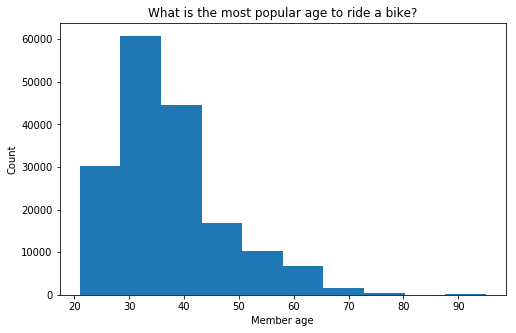

In [4]:
# Create age dataframe 
df_copy['age']=(2022-df_copy['member_birth_year'])
df_copy=df_copy.query('age <= 95')
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'age');
plt.ylabel('Count')
plt.xlabel('Member age')
plt.title('What is the most popular age to ride a bike?');

## 2. How long does the trip take?

Minimum duration for a trip is 60 sec and maximum 25600. with mostly 500 seconds for a trip.

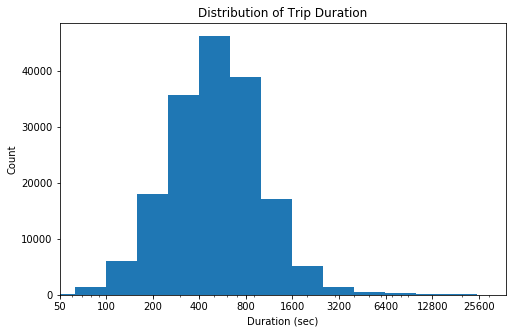

In [5]:
# Axis transformation
# Bin size
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(1, 5+0.2, 0.2)
# Generate the x-ticks 
ticks = [ 50, 100, 200 ,400,800, 1600,3200, 6400 ,  12800 ,12800*2]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xlim(50,12800*3 )
# Plot the histogram
plt.hist(data=df_copy, x='duration_sec', bins=bins);
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);

## 3.What is the most popular places to start and end a bike trip?

As dataset has large numbers for places, I just toke the top 10.

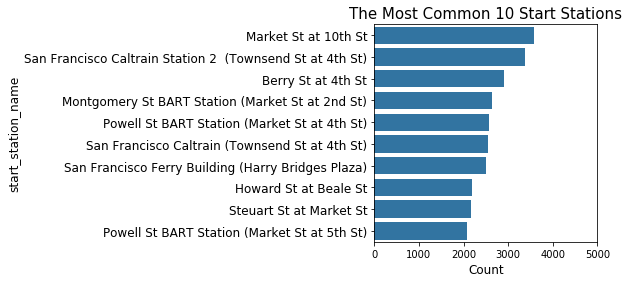

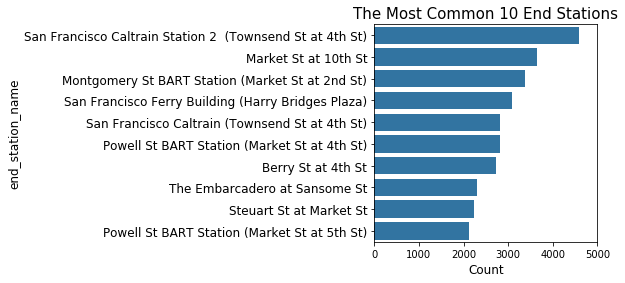

In [6]:
def biketrip(Attribute , title ):
    counts = df_copy[Attribute].value_counts().reset_index(name='number_of_trips')[:10]
    order=counts['index']
    sub=df_copy.loc[df_copy[Attribute].isin(counts["index"])]
    # Styling and defining the graphs
    base_color=sb.color_palette()[0]
    plt.figure(figsize=[4,4])
    ax=sb.countplot(data=sub,y= Attribute, color=base_color, order= order)
    plt.yticks(size=12)
    plt.ylabel(Attribute,size=12)
    plt.xlabel('Count',size=12)
    plt.title(title,size=15);
    plt.xlim(0, 5000)
    
    
biketrip('start_station_name' ,'The Most Common 10 Start Stations')
biketrip('end_station_name' ,'The Most Common 10 End Stations') 

## 4. What is the realtion between Duration, Gender and User type? 

Female has longer trip whether they are subscribers or customers, and customers for both male and female is longer than the subscriber members trips.

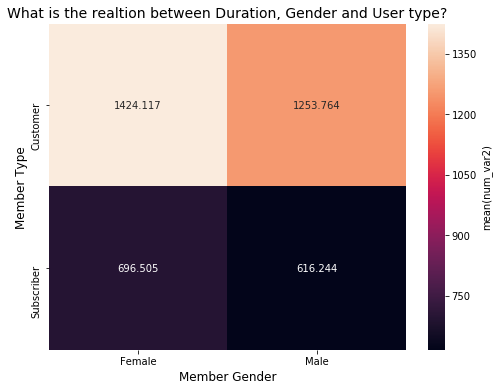

In [7]:
plt.figure(figsize=[8,6])
cat_means = df_copy.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'});
plt.xlabel('Member Gender',size=12)
plt.ylabel('Member Type',size=12)
plt.title('What is the realtion between Duration, Gender and User type?', size=14);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 410655 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/